# 시각화 그래프 표현시  
Colab 에서 Matplotlib 폰트 깨짐

*   STEP 1. 나눔 폰트 설치 (Nanum)
*   STEP 2. 코랩(Colab)의 런타임을 재시작
 (런타임 - 런타임 다시 시작 을 클릭하여 런타임을 재시작)
*   STEP 3. matplotlib의 폰트를 Nanum 폰트로 지정후 확인

In [19]:
#STEP 1. 나눔 폰트 설치 (Nanum)
#!sudo apt-get install   -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (11.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120874 files and direc

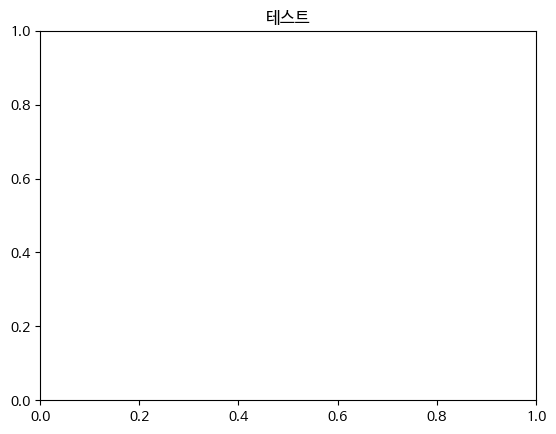

In [1]:
#STEP 3. matplotlib의 폰트를 Nanum 폰트로 지정후 확인
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.title('테스트')
plt.show()

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#푸리에
- 주기적인 파형에 대해서만 사용할 수 있는 푸리에 급수 전개를, 비주기적인 파형 에 대해서 사용할 수 있는 형태로 변형한 것

- 급수 전개
    - 임의의 주기 함수는, 다양한 주파수의 삼각 함수의 합에 의해 나타낼 수 있음
    - 각각의 삼각함수의 진폭은 삼각함수의 직교성(Orthogonality)을 이용하면 간단히 구할 수 있음
  

<ipython-input-3-018402e8d99d>:15: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()


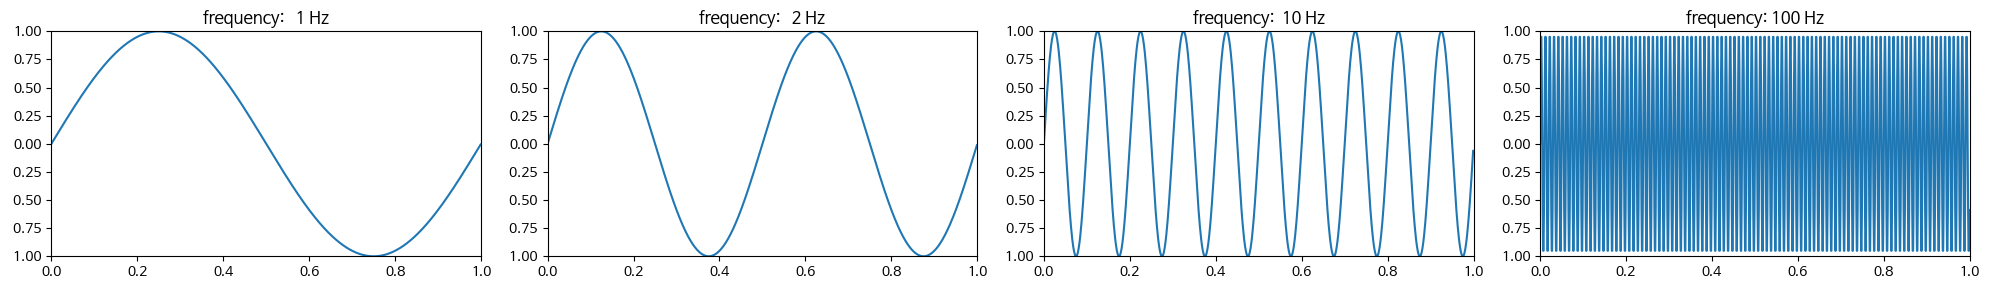

In [3]:
#Q1) 간단한 공간 주파수를  일반 이미지로 그려서 확인
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0, 1, 0.001)    #시간 벡터 선언

Hz = [1, 2, 10, 100]
res = [np.sin(2 * np.pi * t * h) for h in Hz]

plt.figure(figsize=(20,3))
for i, j in enumerate(res):
    plt.subplot(1,4, i+1), plt.plot(t, j)
    plt.xlim(0, 1),  plt.ylim(-1, 1 )
    plt.title("frequency: %3d Hz" % Hz[i])
plt.tight_layout()
plt.show()

<ipython-input-4-610f817585f9>:22: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()


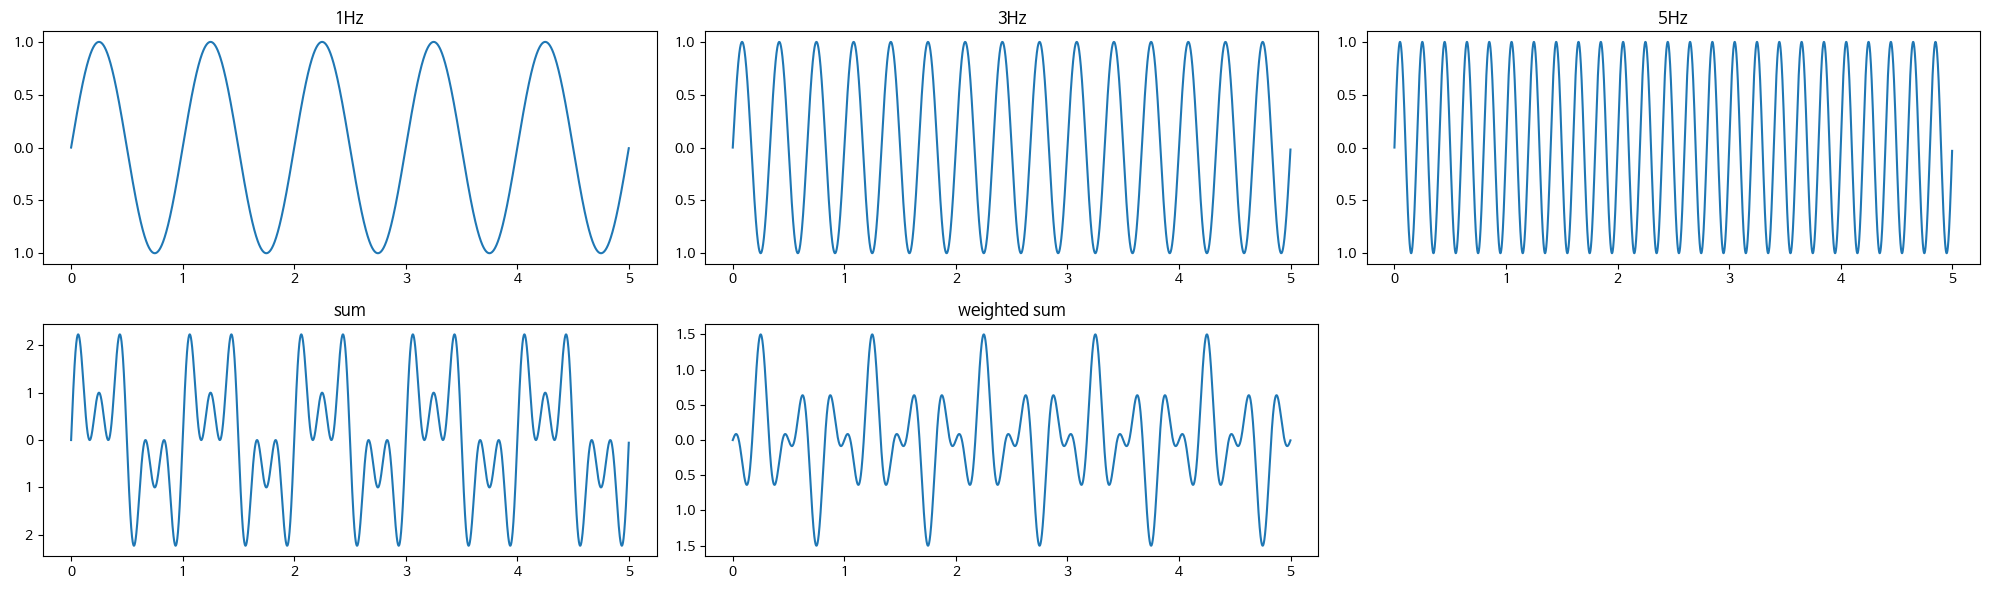

In [4]:
#Q2) 간단한 공간 주파수를  일반 이미지로 그려서 확인 한 것을 파형의 형태로 표시 해보자.
# 다섯개의 그래프를 가지고 각 주파수 성분과 합, 가중치 적용한 합을 시각화 해보자.
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0, 5, 0.001)  # 시간 벡터 't'를 0~ 5까지 0.001의 간격으로 생성
res = [0]*5  # 5개의 결과를 저장할 리스트 객체생성

#정현파를 생성 한다.
res[0] = np.sin(2 * np.pi * t )
res[1] = np.sin(2 * np.pi * t * 3 )
res[2] = np.sin(2 * np.pi * t * 5 )
#정현파을 합산
res[3] = res[0] + res[1] + res[2]
#각 정현파에다가 가중치를 적용
res[4] = 0.3*res[0] - 0.7 * res[1] + 0.5* res[2]

titles = ['1Hz', '3Hz','5Hz','sum','weighted sum']
plt.figure(figsize=(20,6))
for i, title in enumerate(titles):
    plt.subplot(2, 3, i+1), plt.plot(t, res[i]), plt.title(title)
plt.tight_layout()
plt.show()

 영상을 주파수로 변환하면 ?
 - 주파수는 단위 시간에 몇 번의 변화가 일어났는지를 표현하는 방법.

 - 화소의 밝기로 적용하면 영상에서 화소 밝기의 변화가 얼마나 빨리 변화하는가에 따라서 고주파와 저주파로 분류할 수 있다.


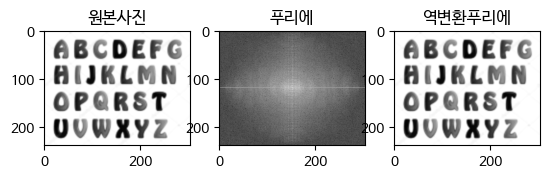

In [5]:
#Q3)푸리에 확인 -> 영상 확인
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

img = cv2.imread('/content/drive/MyDrive/저녁GPT/day06/Letter.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height, width = gray.shape


dft = cv2.dft(np.float32(gray), flags=cv2.DFT_COMPLEX_OUTPUT) #영상을 푸리에 변환시키는 것을 DFT

#주파수가 0인 부분을 정 중앙에 위치시키고, 주파수가 커질수록 가장자리에 위치시킵니다.
dft_shift = np.fft.fftshift(dft) # 주파수 재배열  -> DFT 결과를 중심으로 이동 시킨다.

# magnitude(실수, 허수 ) -> dft_shift 된 값들을 2차원 백터 값을 계산 / 지정값이 크기 때문에 log를 사용
# 고주파수 표시까지 해결
# dft 연산결과는 복소수형태 = 실수부분, 허수부분
res = 20*np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))


#주파수를 반대로 영상에 적용 -> 역 푸리에 변환(Inverse Fourier Transform)
inverse_shift = np.fft.fftshift(dft_shift)  #재배열된 주파수를 원래 배열로 변환
inverse_dft = cv2.dft(inverse_shift, flags=cv2.DFT_INVERSE) #변환된 주파수를 dft함수로  적용 ,flags=cv2.DFT_INVERSE
res02 = cv2.magnitude(inverse_dft[:, :, 0], inverse_dft[:, :, 1]) #영상변환


plt.subplot(131)
plt.imshow(gray, cmap='gray')
plt.title('원본사진')
plt.subplot(132)
plt.imshow(res, cmap='gray')
plt.title('푸리에')
plt.subplot(133)
plt.imshow(res02, cmap='gray')
plt.title('역변환푸리에')
plt.show()

#주파수 확인!
#가운데가 밝은 것을 확인 = 영상이 저주파가 많다는 뜻이며, 밝기의 변화가 급격하게 일어나지 않는다는 뜻


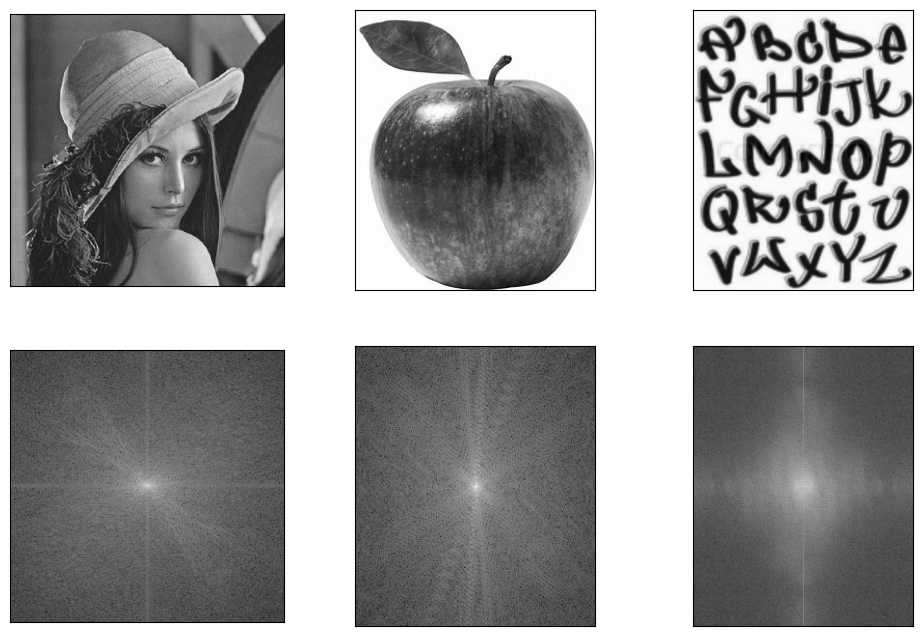

In [6]:
#Q4)
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

img = cv2.imread('/content/drive/MyDrive/저녁GPT/day06/Lenna.jpg',0)
img01 = cv2.imread('/content/drive/MyDrive/저녁GPT/day06/apple.jpg',0)
img02 = cv2.imread('/content/drive/MyDrive/저녁GPT/day06/letters.jpg',0)

imgs = [img, img01, img02]

fig, ax = plt.subplots(2, 3, figsize=(12, 8))

for i in range(3):
    dft = cv2.dft(np.float32(imgs[i]), flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)   # pdf 24.p
    magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))

    ax[0][i].imshow(imgs[i], 'gray')
    ax[0][i].set_xticks([])
    ax[0][i].set_yticks([])

    ax[1][i].imshow(magnitude_spectrum, 'gray')
    ax[1][i].set_xticks([])
    ax[1][i].set_yticks([])


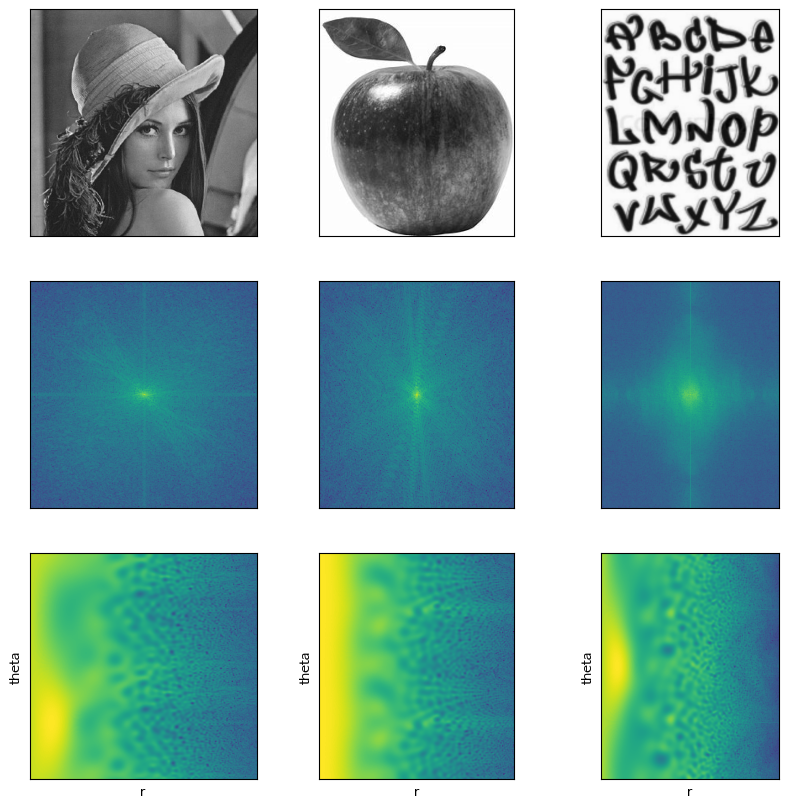

In [7]:
#Q5)
import numpy as np
import matplotlib.pyplot as plt
import cv2

def make_power_sp(img):
    dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
    return magnitude_spectrum

# 입력한 이미지를 극 좌표계( 2D의  한점 = 거리(r), 각도 ) 로 변환 하겠다.    -> 목적  :  원형 물체 중심 찾기,  회전불변
def make_polar_img(img):
    h = img.shape[0] # 이미지 높이
    w = img.shape[1] # 이미지 넓이

    l = np.sqrt(w*w + h*h)  # 이미지의 대각선 길이
    m = l/np.log(l) #로그 - 극좌표 변환

    center = (w/2, h/2) # 이미지 중심좌표
    flags = cv2.INTER_LANCZOS4 + cv2.WARP_POLAR_LOG
    p_a = cv2.warpPolar(img, (w, h), center, m, flags) #이미지 좌표 변형  / 입력한 이미지를 극 좌표계로 변환
    return p_a


img = cv2.imread('/content/drive/MyDrive/저녁GPT/day06/Lenna.jpg',0)
img01 = cv2.imread('/content/drive/MyDrive/저녁GPT/day06/apple.jpg',0)
img02 = cv2.imread('/content/drive/MyDrive/저녁GPT/day06/letters.jpg',0)

imgs = [img, img01, img02]


fig, ax = plt.subplots(3, 3, figsize=(10, 10), subplot_kw=({"xticks":(), "yticks":()}))
for i in range(3):
    ft_img = make_power_sp(imgs[i])
    p_img = make_polar_img(ft_img)

    ax[0][i].imshow(imgs[i], cmap = 'gray')
    ax[1][i].imshow(ft_img, cmap = 'viridis')
    ax[2][i].imshow(p_img, cmap = 'viridis')
    ax[2][i].set_xlabel('r')
    ax[2][i].set_ylabel('theta')

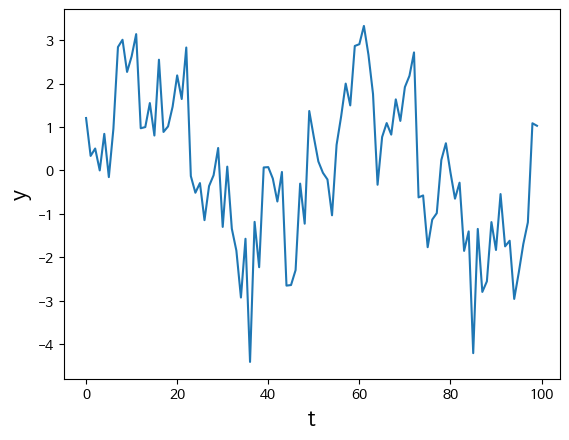

In [8]:
#ex01)푸리에 공식을 사용한 공식 _시각화

import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
np.random.seed(43)

t = np.arange(100)
y = 2.0 * np.sin(2*np.pi * t / 50) + 1.0 * np.cos(2 * np.pi * t / 10) + 0.8 * np.random.randn(t.shape[0])

plt.plot(t, y);
plt.xlabel('t', fontsize=15);
plt.ylabel('y', fontsize=15);

In [9]:
#1-1 . 프로그래밍 해서 결과를 리턴받고 싶다. np.fft.fft()
ck = np.fft.fft(y)
print(ck.shape)
print(ck)

(100,)
[ 5.16661036e+00+0.00000000e+00j  5.06615932e-01-5.03501967e+00j
 -2.12936638e+00-9.43551906e+01j  1.98335511e+00-5.61135923e+00j
 -6.15894743e-01-4.33863092e+00j  1.14871744e+01-4.58183639e+00j
 -8.92270251e+00+5.86344294e-01j  4.18170064e+00+4.80600878e+00j
 -5.18401794e+00+4.73643907e+00j -6.37357365e+00+1.28349770e-01j
  5.19969556e+01+2.70598542e+00j -2.88031653e+00+7.14948643e+00j
  5.18209652e+00+1.18470480e+01j  3.91264202e+00-2.68019125e+00j
  1.06206655e+01+5.91905424e+00j  1.09137771e-01-3.20646923e+00j
 -7.94071361e+00+4.17860080e+00j -7.14735971e+00-6.18452332e-01j
  8.06878511e+00+5.94921305e+00j -3.01725506e+00+4.21001845e+00j
 -4.52101899e+00-6.84017818e+00j  1.40586728e+00-5.11794717e-01j
 -6.35198586e+00+1.49069268e+00j  1.46637340e+00+3.74691997e+00j
  7.36744065e-01+3.77455982e+00j  1.87915953e-02+8.49252538e+00j
 -4.19628129e-02+1.04133915e+00j -1.22533678e+00-6.23608078e-01j
  8.88294899e+00+3.75081488e-02j  3.18349526e+00-4.10709079e+00j
 -1.23786896e+00+4

In [10]:
#1-2 . 결과값이 실수 라면 . np.fft.rfft()
ck = np.fft.rfft(y)
print(ck.shape)
print(ck)

(51,)
[ 5.16661036e+00+0.00000000e+00j  5.06615932e-01-5.03501967e+00j
 -2.12936638e+00-9.43551906e+01j  1.98335511e+00-5.61135923e+00j
 -6.15894743e-01-4.33863092e+00j  1.14871744e+01-4.58183639e+00j
 -8.92270251e+00+5.86344294e-01j  4.18170064e+00+4.80600878e+00j
 -5.18401794e+00+4.73643907e+00j -6.37357365e+00+1.28349770e-01j
  5.19969556e+01+2.70598542e+00j -2.88031653e+00+7.14948643e+00j
  5.18209652e+00+1.18470480e+01j  3.91264202e+00-2.68019125e+00j
  1.06206655e+01+5.91905424e+00j  1.09137771e-01-3.20646923e+00j
 -7.94071361e+00+4.17860080e+00j -7.14735971e+00-6.18452332e-01j
  8.06878511e+00+5.94921305e+00j -3.01725506e+00+4.21001845e+00j
 -4.52101899e+00-6.84017818e+00j  1.40586728e+00-5.11794717e-01j
 -6.35198586e+00+1.49069268e+00j  1.46637340e+00+3.74691997e+00j
  7.36744065e-01+3.77455982e+00j  1.87915953e-02+8.49252538e+00j
 -4.19628129e-02+1.04133915e+00j -1.22533678e+00-6.23608078e-01j
  8.88294899e+00+3.75081488e-02j  3.18349526e+00-4.10709079e+00j
 -1.23786896e+00+4.

In [11]:
#1-3 값을 확인 해보자 .
y.shape , y.shape[0] , ck.shape, ck[0]  # 입력된 데이터가 실수일 경우 복소수가 리턴

((100,), 100, (51,), (5.166610358385194+0j))

In [12]:
#1-4. 복소수를 정리해서 시각화 다시 해보자.
T = y.shape[0]

if  T %2 == 0:
    c = (ck[0].real  + ck[-1].real) /T
    ak = ck[1:-1].real * 2 / T
    bk = -ck[1:-1].imag * 2 / T
else:
    c =ck[0] .real /T
    ak = ck[1:].real *2 / T
    bk= -ck[1:].imag *2 / T


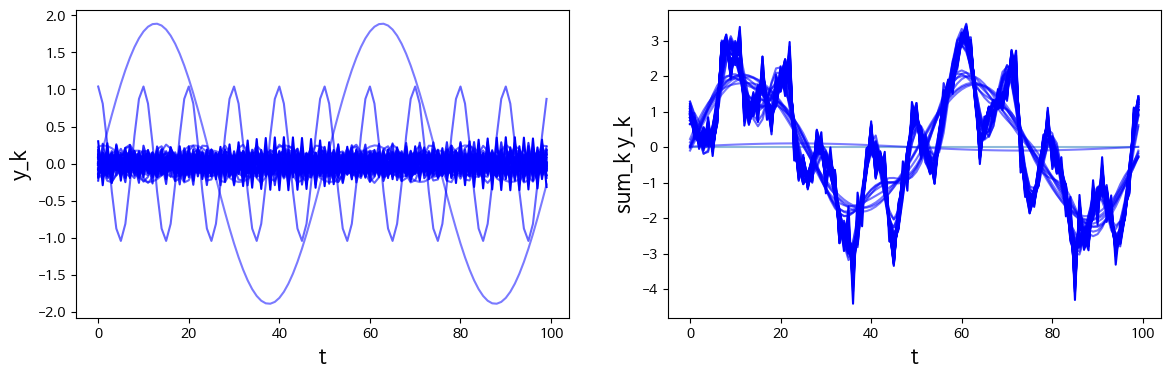

In [13]:
#1-5  시각화를 해보자 . 노이즈를 확인 하자 .  ak, bk
# 각 주파수 성능과 어느 정도의 누적합을 시각화 해서 노이즈 확인
fig, axes = plt.subplots(1,2, figsize =(14,4))
ax1, ax2 = axes

y_sum  = c * np.ones_like(t)

ax1.plot(y_sum, alpha =0.5)
ax2.plot(y_sum, alpha =0.5)

for k, (a,b) in enumerate(zip(ak, bk) , 1) :
     y_k=b * np.sin(2*np.pi * k / T*t ) + a * np.cos(2 * np.pi * k / T*t)
     y_sum += y_k

     ax1.plot(t, y_k, alpha = k / ak.shape[0]/2+  0.5, color = 'blue')
     ax2.plot(t, y_sum , alpha = k / ak.shape[0]/2+  0.5, color = 'blue')

     ax1.set_ylabel('y_k' , fontsize =15)
     ax2.set_ylabel('sum_k y_k' , fontsize =15)

     ax1.set_xlabel('t', fontsize=15)
     ax2.set_xlabel('t', fontsize=15)

In [14]:
#1-6 스펙트럼을 사용해 보자.
sf = np.zeros_like(ck.real)
sf

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
sf[0] = (ck[0].real / T)**2
sf[1:-1] = (ak ** 2 + bk ** 2) * 0.5
sf[-1] = (ck[-1].real / T) **2

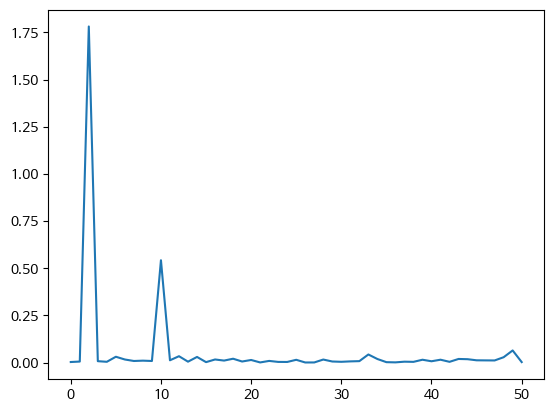

In [16]:
plt.plot(sf);
